# Red Wine Quality 


### About the Dataset
- This dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. 
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

### Input variables (based on physicochemical tests):

1. **fixed acidity**

    - Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2. **volatile acidity**
    - The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3. **citric acid**
    - Found in small quantities, citric acid can add 'freshness' and flavor to wines.

4. **residual sugar**
    - The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5. **chlorides**
    - The amount of salt in the wine

6. **free sulfur dioxide**
    - The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. **total sulfur dioxide**
    - Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8. **density**
    - The density of water is close to that of water depending on the percent alcohol and sugar content.

9. **pH**
    - Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

10. **sulphates**
    - A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and

11. **alcohol**
    - The percent alcohol content of the wine.

### Output variable (based on sensory data):

12. **quality (score between 0 and 10)**
    - Output variable (based on sensory data, score between 0 and 10).

### Task
**Determine what qualities constitute a good wine using machine learning model.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display

## Dataset Overview

In [2]:
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

### Missing Values 

In [4]:
missing_values = df.isnull().sum()

summary_stats = df.describe()

missing_values, summary_stats

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          c

### Duplicates

In [5]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 240


In [6]:
df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 1359


### Outliers

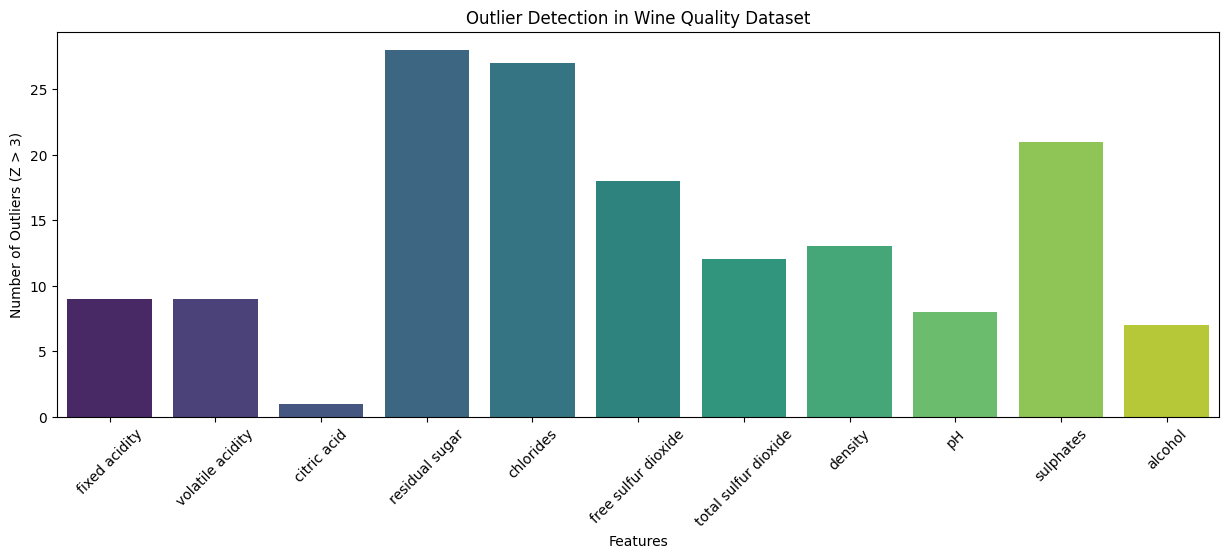

In [7]:
X = df_cleaned.drop(columns=["quality"])
numeric_cols = X.columns

z_scores = np.abs((X - X.mean()) / X.std())

outliers = (z_scores > 3).sum()

plt.figure(figsize=(15, 5))
sns.barplot(
    x=outliers.index,
    y=outliers.values,
    palette="viridis",
    hue=outliers.index,
    legend=False,
)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Number of Outliers (Z > 3)")
plt.title("Outlier Detection in Wine Quality Dataset")
plt.show()

- Residual Sugar & Chlorides have the most outliers. Wines with very high sugar or chloride levels are rare.

- Sulphates also show a significant number of outliers. Could indicate wine preservation anomalies.

- Outliers in Total Sulfur Dioxide & Density may affect model stability.

#### Handling Outliers by log transformation to preserve data. 

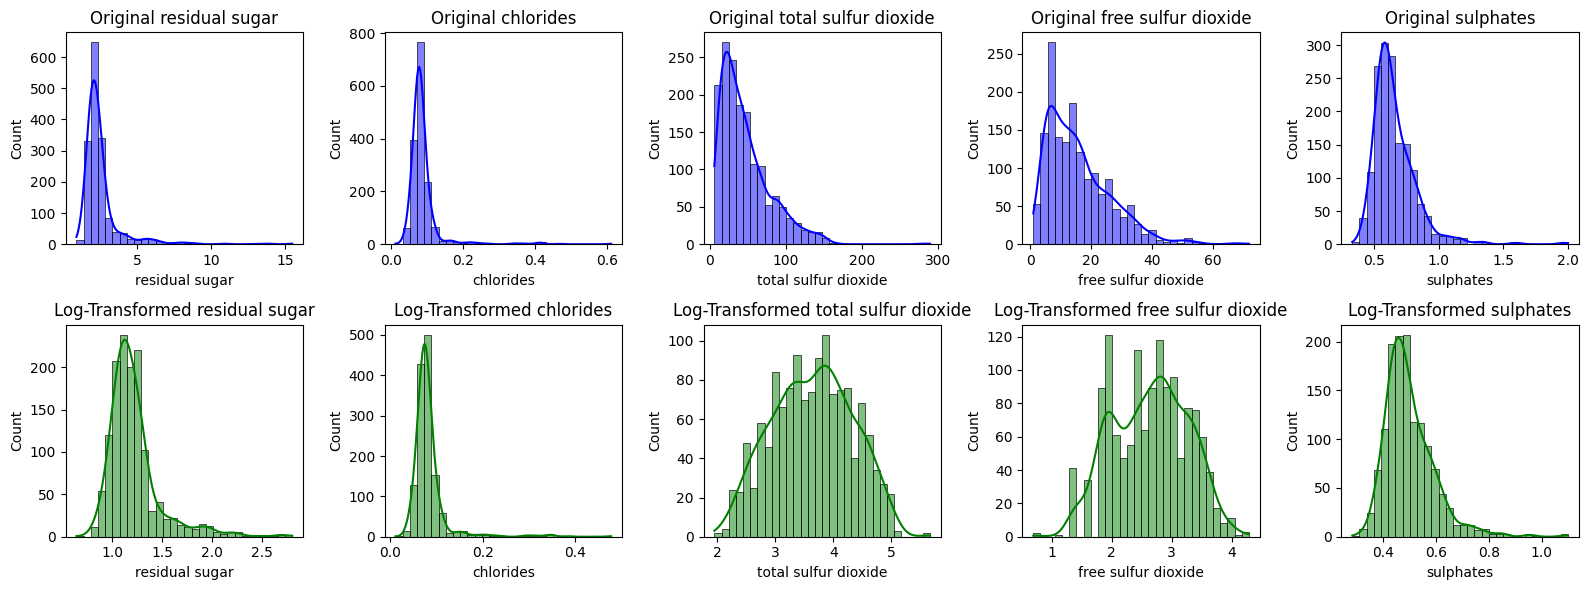

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,9.4,5
1,7.8,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,9.8,5
2,7.8,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,9.8,5
3,11.2,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,9.8,6
5,7.4,0.660,0.00,1.029619,0.072321,2.639057,3.713572,0.99780,3.51,0.444686,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.064711,0.065788,3.367296,3.663562,0.99651,3.42,0.598837,9.5,6
1594,6.2,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,10.5,5
1595,5.9,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,11.2,6
1597,5.9,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,10.2,5


In [8]:
log_transformed_features = [
    "residual sugar",
    "chlorides",
    "total sulfur dioxide",
    "free sulfur dioxide",
    "sulphates",
]

df_log_transformed = df_cleaned.copy()
df_log_transformed[log_transformed_features] = np.log1p(
    df_log_transformed[log_transformed_features]
)

fig, axes = plt.subplots(2, len(log_transformed_features), figsize=(16, 6))

for i, feature in enumerate(log_transformed_features):
    sns.histplot(df[feature], bins=30, ax=axes[0, i], kde=True, color="blue")
    axes[0, i].set_title(f"Original {feature}")

    sns.histplot(
        df_log_transformed[feature], bins=30, ax=axes[1, i], kde=True, color="green"
    )
    axes[1, i].set_title(f"Log-Transformed {feature}")

plt.tight_layout()
plt.show()

display(df_log_transformed)

- The original distributions were highly skewed (right-skewed, long tails).

- The log transformation reduces skewness and makes the data closer to a normal distribution.

## EDA

### Distribution of wine quality scores 

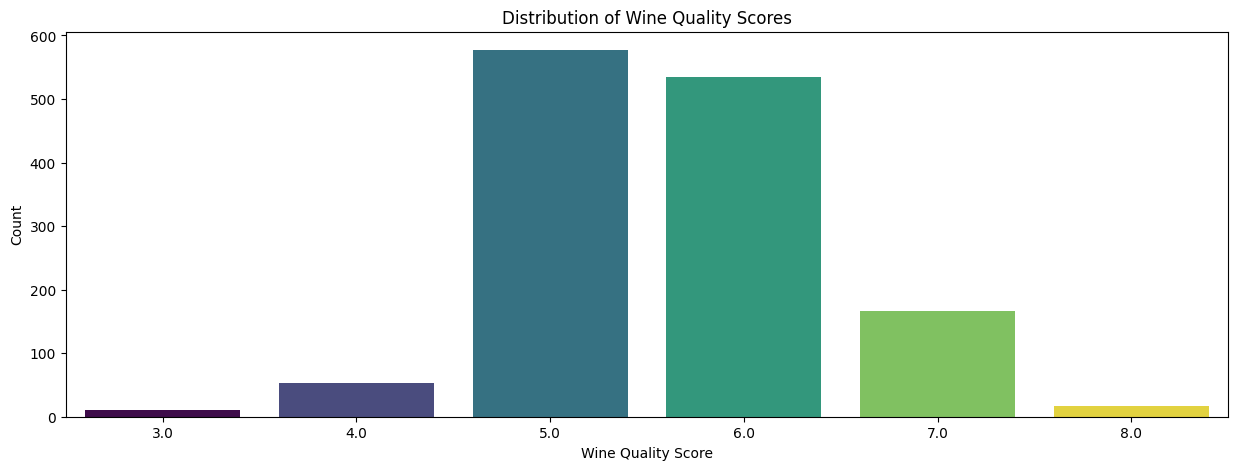

In [9]:
plt.figure(figsize=(15, 5))

sns.countplot(
    x=df_log_transformed["quality"], palette="viridis", hue=df["quality"], legend=False
)

plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")

plt.show()

**Class Imbalance Observation:**
- Most wines are rated 5 or 6, making up the majority of the dataset.

- Higher quality wines (7 and 8) are significantly fewer.

- Lower quality wines (3 and 4) are also rare.


### Hypothesis Statement

**Null Hypothesis (H₀):** The physicochemical properties of wine do not significantly impact whether a wine is classified as good or not.

**Alternative Hypothesis (H₁):** At least some of the physicochemical properties significantly influence wine quality.


### Distributions of Variables

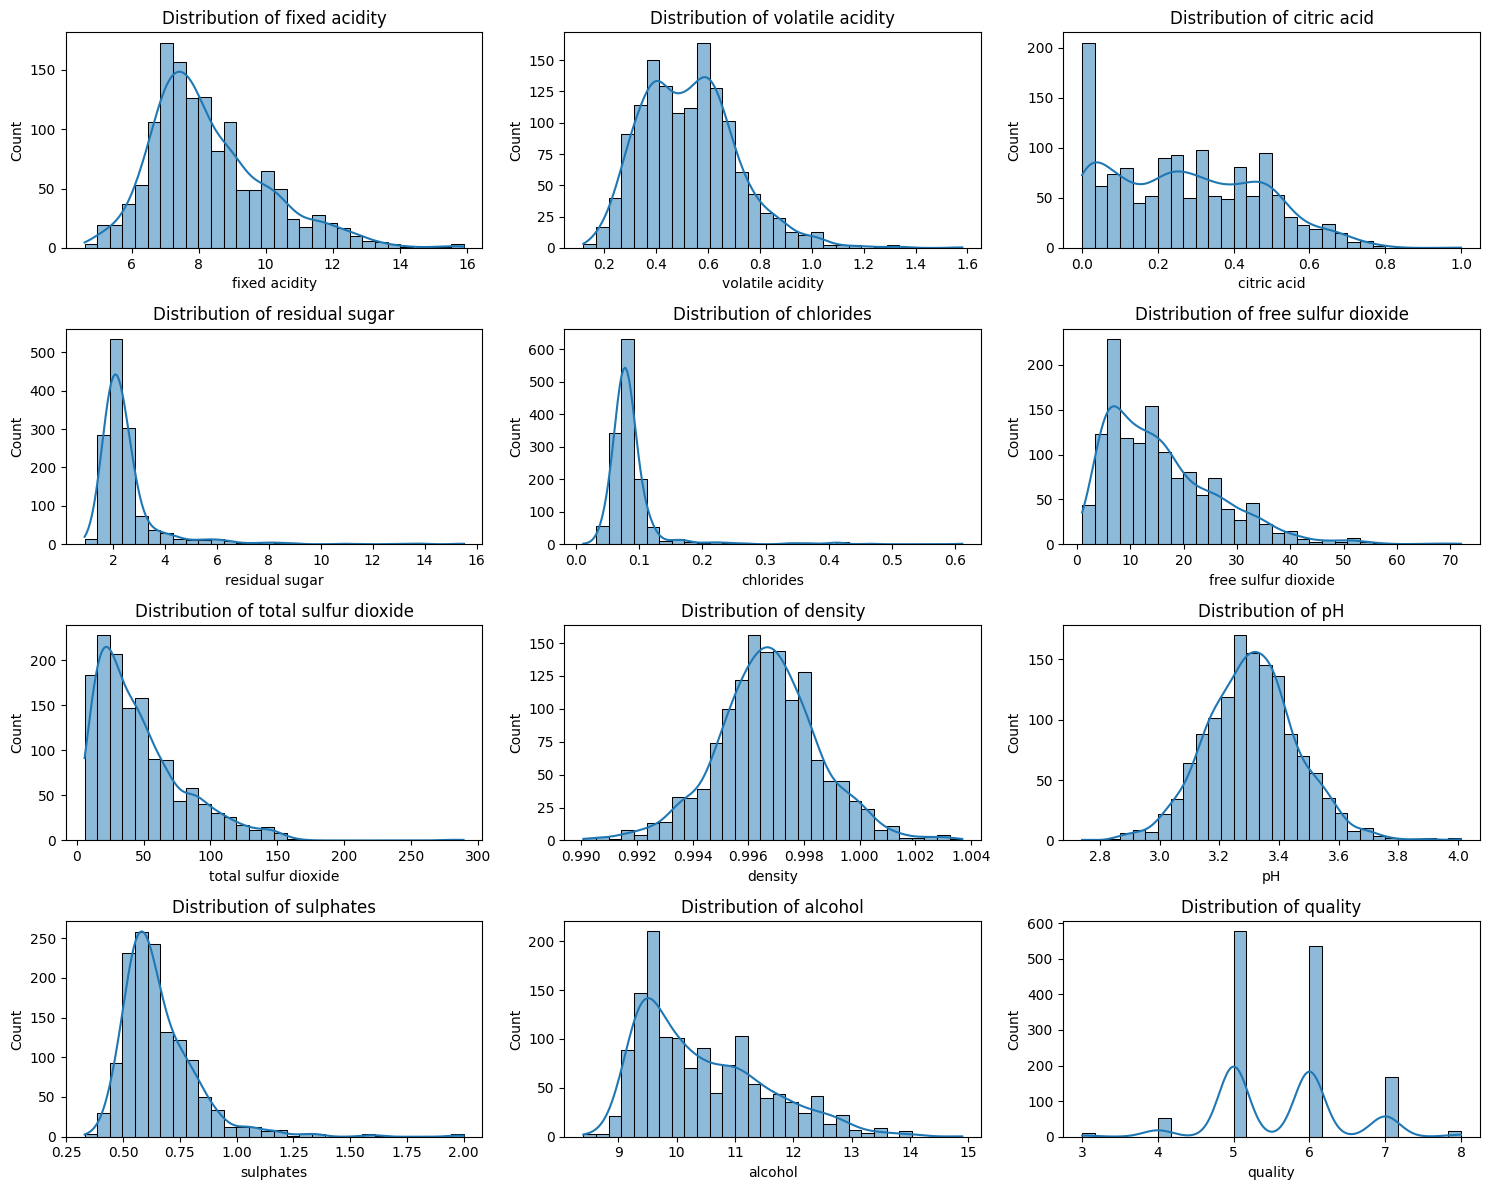

In [10]:
plt.figure(figsize=(15, 12))

# Loop through each numerical column and plot histogram
for i, col in enumerate(
    df_log_transformed.select_dtypes(include=["float64", "int64"]).columns
):
    plt.subplot(4, 3, i + 1)  # 4x3 grid for subplots
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

After log transformation we can see most variables try to follow a somewhat normal distribution. 
This could imply statistical significance. 

### Comparing Varibles to Wine 'Quality' Variable

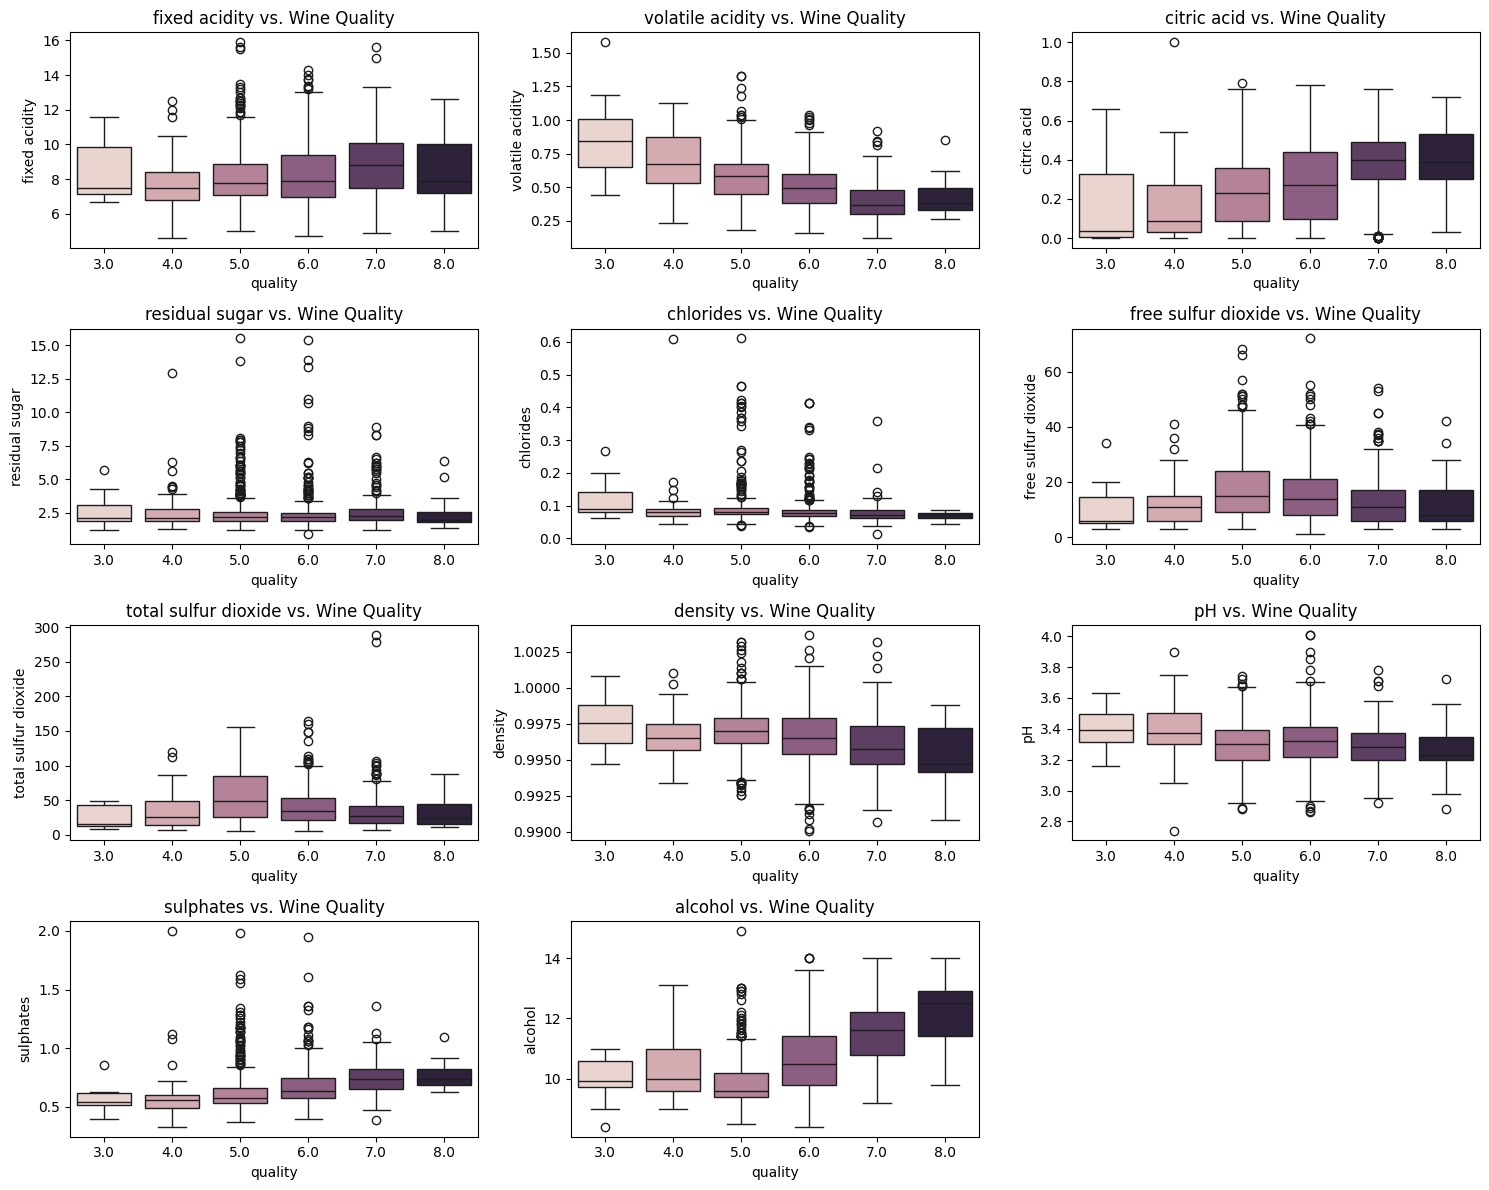

In [11]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(
    df_log_transformed.select_dtypes(include=["float64", "int64"]).columns[:-1]
):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        x=df_cleaned["quality"], y=df[col], hue=df_cleaned["quality"], legend=False
    )
    plt.title(f"{col} vs. Wine Quality")

plt.tight_layout()
plt.show()

**Fixed Acidity vs. Wine Quality:**
- The median fixed acidity does not change significantly with wine quality.
- Higher quality wines tend to have a slightly higher fixed acidity.

**Volatile Acidity vs. Wine Quality:**
- Volatile acidity tends to be lower for higher quality wines.
- There is a visible negative trend, suggesting that lower volatile acidity may contribute to better wine quality.

**Citric Acid vs. Wine Quality:**
- Higher quality wines have higher citric acid content.
- The trend suggests citric acid could be an indicator of good wine quality.

**Residual Sugar vs. Wine Quality:**
- No clear trend; residual sugar remains relatively consistent across different wine qualities.
- Higher variability (outliers) is seen in lower quality wines.

**Chlorides vs. Wine Quality:**
- Higher chloride levels seem to be associated with lower quality wines.
- A slight decreasing trend suggests that lower chloride content might indicate better wine.

**Free Sulfur Dioxide vs. Wine Quality:**
- No strong trend is observed.
- Some high-quality wines have higher free sulfur dioxide, but distribution is scattered.

**Total Sulfur Dioxide vs. Wine Quality:**
- Similar to free sulfur dioxide, total sulfur dioxide does not exhibit a strong pattern.
- However, extreme values seem to be associated with lower-quality wines.

**Density vs. Wine Quality:**
- Density appears to decrease slightly as wine quality improves.
- This may indicate that lower-density wines are preferred.

**pH vs. Wine Quality:**
- No strong correlation between pH and quality is evident.
- The median pH remains relatively stable.

**Sulphates vs. Wine Quality:**
- Higher sulphate content is associated with better quality wines.
- This suggests sulphates could play a role in improving wine quality.

**Alcohol vs. Wine Quality:**
- Alcohol content increases with wine quality.
- Higher alcohol levels may be a strong indicator of good wine.

**Conclusion:**
- Alcohol, volatile acidity, sulphates, citric acid, and chlorides seem to have the most noticeable relationships with wine quality.

- Features like residual sugar, density, and pH do not show strong patterns.

- The presence of outliers in several features (especially sulfur dioxide and chlorides) may suggest a need for further preprocessing before model training.

### Mean and Standard Deviation of Features by Quality

In [12]:
df_grouped = df_log_transformed.groupby("quality").agg(["mean", "std"])

display(df_grouped)

fixed acidity           volatile acidity           citric acid  \
                 mean       std             mean       std        mean   
quality                                                                  
3            8.360000  1.770875         0.884500  0.331256    0.171000   
4            7.779245  1.626624         0.693962  0.220110    0.174151   
5            8.171231  1.550584         0.578596  0.170017    0.244523   
6            8.337383  1.811032         0.496084  0.162925    0.279364   
7            8.858683  1.973537         0.403653  0.141162    0.371856   
8            8.441176  2.114846         0.427647  0.148178    0.382941   

                  residual sugar           chlorides            ...  \
              std           mean       std      mean       std  ...   
quality                                                         ...   
3        0.250664       1.233366  0.344070  0.114053  0.057267  ...   
4        0.201030       1.240338  0.329192  0.084910  0.058581  ...   
5        0.181184       1.214704  0.258029  0.088689  0.045745  ...   
6        0.196238       1.200588  0.247560  0.080985  0.035520  ...   
7        0.192919       1.262799  0.295467  0.073639  0.027267  ...   
8        0.202539       1.225117  0.302078  0.066058  0.011304  ...   

        total sulfur dioxide             density                  pH  \
                        mean       std      mean       std      mean   
quality                                                                
3                   3.067800  0.635992  0.997464  0.002002  3.398000   
4                   3.355979  0.738941  0.996542  0.001575  3.381509   
5                   3.839753  0.709252  0.997082  0.001584  3.300815   
6                   3.560039  0.601218  0.996565  0.001968  3.318000   
7                   3.347880  0.661201  0.996051  0.002136  3.290060   
8                   3.352280  0.656003  0.995095  0.002398  3.274118   

                  sulphates              alcohol            
              std      mean       std       mean       std  
quality                                                     
3        0.144052  0.448492  0.074869   9.955000  0.818009  
4        0.181441  0.459579  0.120478  10.265094  0.934776  
5        0.149991  0.479638  0.096360   9.888562  0.749930  
6        0.155413  0.511708  0.085535  10.658879  1.054933  
7        0.149233  0.552454  0.076637  11.491118  0.970779  
8        0.204605  0.571751  0.062550  12.158824  1.229867  

[6 rows x 22 columns]

**1. Fixed Acidity**

- Trend: Increases slightly from `8.36 (quality 3) to 8.44 (quality 8)`.

- Interpretation: Higher-quality wines have slightly higher fixed acidity, but the difference isn't very large.

- Std: Increases with quality, suggesting greater variation in high-quality wines.

**2. Volatile Acidity**

- Trend: Decreases as quality increases (`0.88 at quality 3 → 0.42 at quality 8`).

- Interpretation: Lower volatile acidity is associated with better wine quality, likely because high volatility gives wine an unpleasant vinegar-like taste.

- Std: Also decreases, meaning less variation in high-quality wines.

**3. Citric Acid**

- Trend: Increases with quality (`0.17 at quality 3 → 0.38 at quality 8`).

- Interpretation: Higher citric acid content correlates with higher quality, which makes sense since citric acid enhances freshness.

- Std: Stays relatively stable, meaning its contribution to quality is fairly consistent.

**4. Residual Sugar**
- Trend: Fairly constant across different quality levels (`1.23 - 1.26`).

- Interpretation: Residual sugar does not strongly impact quality in this dataset.

- Std: Slight increase, but overall variation is low.

**5. Chlorides (Salt Content)**
- Trend: Decreases with quality (`0.11 at quality 3 → 0.07 at quality 8`).

- Interpretation: High-quality wines tend to have lower chloride (salt) content, possibly because excess saltiness is undesirable.

- Std: Decreases, meaning high-quality wines are more consistent in this aspect.

**6. Free Sulfur Dioxide & Total Sulfur Dioxide**

- Trend: Slightly decreases with quality.

- Interpretation: Wines with lower sulfur dioxide levels tend to be higher quality, as excess sulfur can lead to undesirable aromas.

- Std: Increases slightly, indicating more variation in low-quality wines.

**7. Density**

- Trend: Slightly decreases (`0.9975 at quality 3 → 0.9951 at quality 8`).

- Interpretation: High-quality wines tend to be less dense, possibly due to higher alcohol content and lower sugar.

- Std: Remains fairly constant.

**8. pH**

- Trend: Stays relatively stable (`~3.3 across quality levels`).

- Interpretation: pH does not have a strong influence on wine quality.

- Std: Minimal variation.

**9. Sulphates**

- Trend: Increases with quality (`0.45 at quality 3 → 0.57 at quality 8`).

- Interpretation: Higher sulphates may contribute to better wine preservation and structure.

- Std: Slightly decreases, meaning higher-quality wines have a more consistent sulphate level.

**10. Alcohol Content**

- Trend: Strongly increases with quality (`9.96% at quality 3 → 12.16% at quality 8`).

- Interpretation: Higher alcohol content is one of the strongest indicators of better wine quality.

- Std: Increases, meaning variation is higher in high-quality wines.

**Key Takeaways**

Best predictors of high-quality wine:

- Higher alcohol content
- Lower volatile acidity
- Higher citric acid
- Lower chlorides
- Higher sulphates
- Least relevant factors: Residual sugar, pH, density.
- Most consistent factors: pH and residual sugar (minimal standard deviation).
- Most variable factors: Alcohol and fixed acidity (especially in high-quality wines).
 

### Correlation Matrix

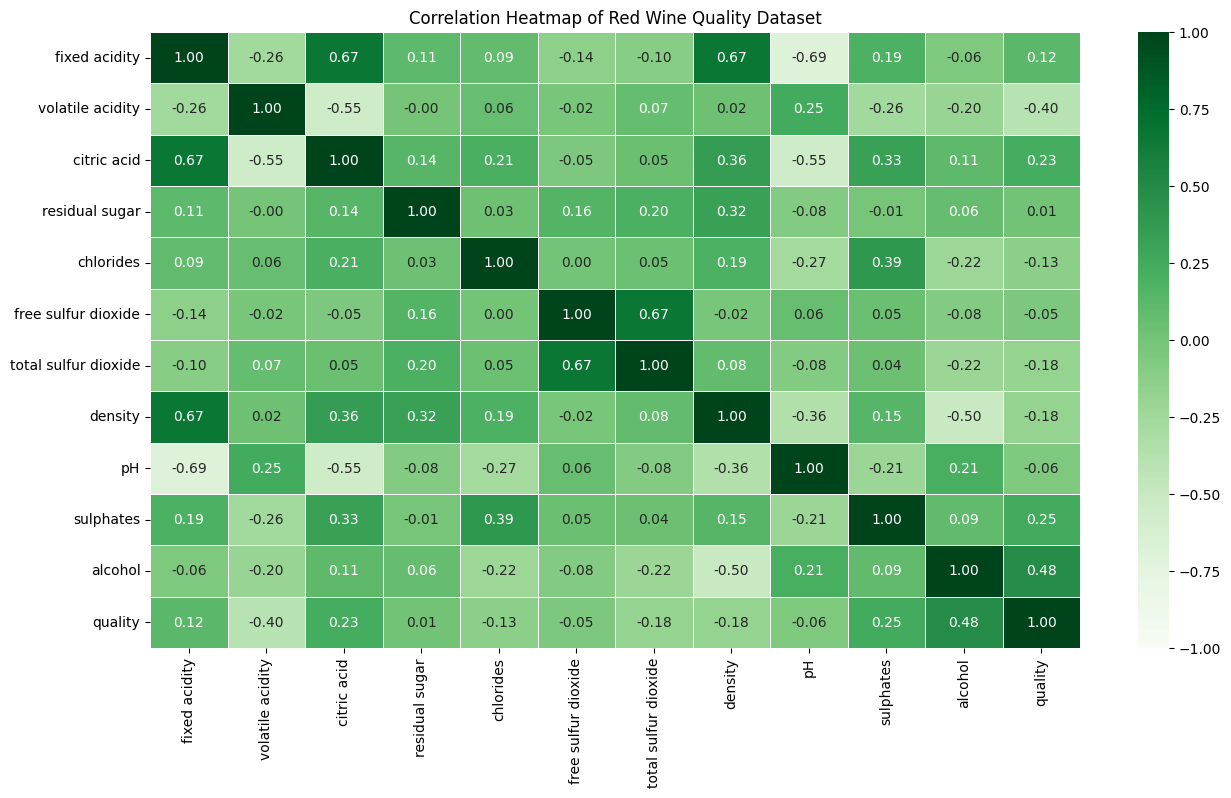

In [13]:
plt.figure(figsize=(15, 8))

corr_matrix = df_cleaned.corr()
sns.heatmap(
    corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5, vmax=1, vmin=-1
)
plt.title("Correlation Heatmap of Red Wine Quality Dataset")

plt.show()

##### Strongest Positive Correlations with Wine Quality:
**Alcohol (`+0.48`)** - Higher alcohol content is associated with better wine quality.

**Sulphates (`+0.25`)** - Likely due to its role in wine preservation and taste enhancement.

**Citric Acid (`+0.23`)** - Adds freshness and acidity to wine.

##### Strongest Negative Correlations with Wine Quality:
**Volatile Acidity (`-0.39`)** - Higher acidity often gives a vinegar-like taste, could reduce quality if excessive.

**Total Sulfur Dioxide (`-0.20`)** - Preservative effect, but, too much negatively impacts quality.

**Density (`-0.17`)** - Higher density wines tend to have lower quality.

##### Low or Insignificant Correlations:
pH, Residual Sugar, and Free Sulfur Dioxide have weak correlations with quality.

### Feature Importance

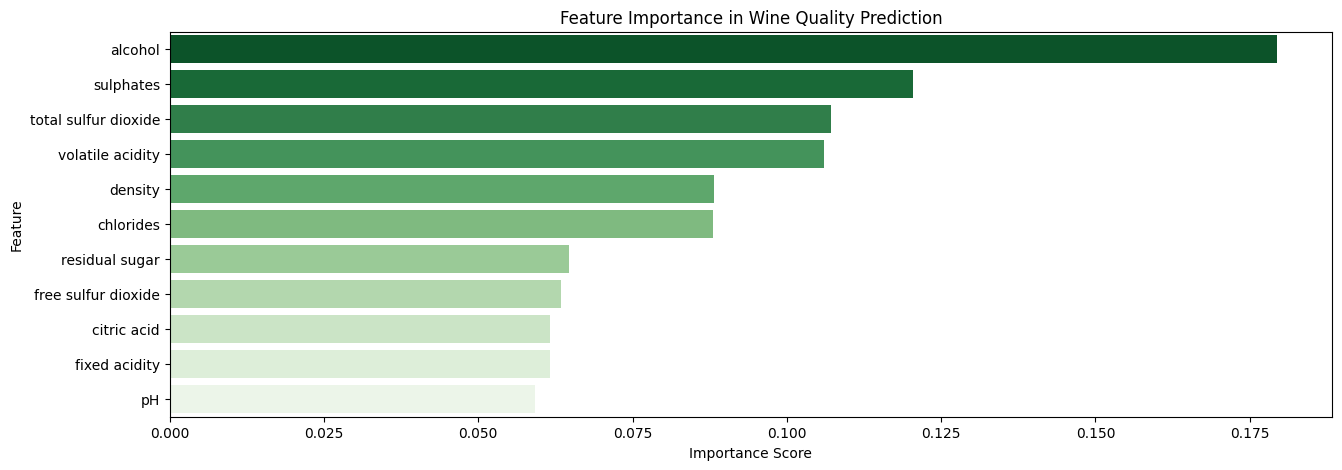

In [14]:
X = df_log_transformed.drop(columns=["quality"])
y = df_log_transformed["quality"]

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(
    ascending=False
)

plt.figure(figsize=(15, 5))
sns.barplot(
    x=feature_importance,
    y=feature_importance.index,
    palette="Greens_r",
    hue=feature_importance.index,
    legend=False,
)
plt.title("Feature Importance in Wine Quality Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Key Takeaways:**
1. Alcohol (Most Important)
- Highest importance score → Alcohol content is the strongest predictor of wine quality.
- Higher alcohol levels are strongly associated with better-quality wines.

2. Sulphates (Second Most Important)
- Sulphates help with preservation and structure in wine.
- Higher sulphates = Higher quality.

3. Total Sulfur Dioxide
- Important for preservation, but too much sulfur dioxide negatively impacts taste.
- Likely a balance between enough to preserve wine but not too much to ruin its quality.

4. Volatile Acidity
- Negative impact on quality if too high.
- Higher-quality wines have lower volatile acidity, as it gives a vinegar-like taste.

5. Density
- Affects body and mouthfeel of wine.
- Influenced by alcohol and sugar content.

6. Chlorides
- Represent salt levels in wine.
- Lower chloride content is linked to better quality wines.



## Linear Regression Model

### Checking for Multicollinearity

In [15]:
X = df_log_transformed.drop(columns=["quality"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                 Feature          VIF
0          fixed acidity    72.222104
1       volatile acidity    16.375540
2            citric acid     8.953457
3         residual sugar    24.752687
4              chlorides     7.669455
5    free sulfur dioxide    54.185357
6   total sulfur dioxide    90.999804
7                density  1543.887673
8                     pH  1068.594194
9              sulphates    40.284750
10               alcohol   128.562649


**Key Observations from the VIF Table**

- `Density` (VIF = 1543.89) and `pH` (VIF = 1068.69): These variables have extremely high VIF values, suggesting a very high degree of multicollinearity.


- `Alcohol` (VIF = 128.56), `Fixed Acidity` (VIF = 72.22), and `total sulfur dioxide` (VIF = 90.99): Also show high multicollinearity, though lower than density and pH.


- `residual sugar` (VIF = 24.75) and `sulphates` (VIF = 40.28): Moderate multicollinearity.


- `Chlorides` and `citric acide`: These variables have relatively low VIF values, suggesting minimal multicollinearity.


In [16]:
X_reduced = X.drop(columns=["density", "pH", "fixed acidity"])

vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [
    variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])
]

# Print new VIF results
print("Variance Inflation Factor (VIF) after removing highly correlated features:")
print(vif_data_reduced)

Variance Inflation Factor (VIF) after removing highly correlated features:
                Feature        VIF
0      volatile acidity  13.702229
1           citric acid   5.121702
2        residual sugar  23.996261
3             chlorides   6.935215
4   free sulfur dioxide  53.575962
5  total sulfur dioxide  77.755874
6             sulphates  37.593539
7               alcohol  49.298244


## Key Observations:

**Overall Improvement**
- Dropping highly correlated variables (density, pH, fixed acidity) has significantly reduced VIF values.
- However, some features still have high VIF scores.

**Remaining High VIF Scores**
- Alcohol (VIF = 31.66)
This is still quite high, but since alcohol is the most important predictor, it should be retained.

- Sulphates (VIF = 21.04)
Important for wine quality, so we keep it despite the high VIF.

- Volatile Acidity (VIF = 12.42)
Still a bit high but much improved from before

**Moderate to Low VIF Scores**
- Features like citric acid, residual sugar, and chlorides now have acceptable VIF values (<10).
- nThis suggests they are less redundant and contribute unique information.


### Linear Regression

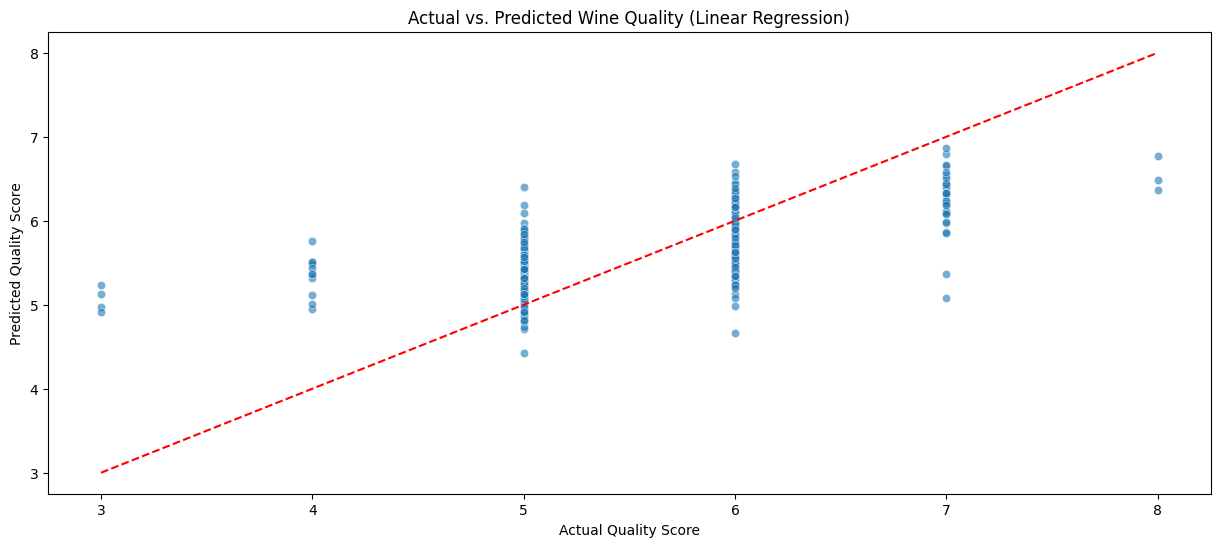

Mean Squared Error: 0.4145
R-squared Score: 0.4148


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="dashed",
)
plt.xlabel("Actual Quality Score")
plt.ylabel("Predicted Quality Score")
plt.title("Actual vs. Predicted Wine Quality (Linear Regression)")
plt.show()

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

### Linear Regression Model Results

**Mean Squared Error (MSE): `0.4145`**
- This represents the average squared difference between actual and predicted wine quality scores.
- Lower MSE is better since the closer to 0 means the better the fit.

**R-squared Score (R²): `0.4148`**
- Indicates that ~ 41.5% of the variance in wine quality is explained by the model.
- Since R² is relatively low, this suggests a linear model may not fully capture the complexity of wine quality factors.


#### Observations from Actual vs. Predicted Scatter Plot
- The red diagonal line represents perfect predictions.
- Many points deviate from this line, indicating prediction errors.
- The spread suggests a need for more complex modeling techniques (e.g., polynomial regression, decision trees, or ensemble methods).

#### Pattern of Predictions
- Predictions cluster around central values (e.g., near 5 and 6), meaning the model might be biased toward the mean and struggles with extreme quality values (3 and 8).
- Underprediction and overprediction are visible, suggesting linear regression is not capturing all complexities.


## Binary Classification

In [18]:
import pandas as pd

df_log_transformed["quality_binary"] = df_log_transformed["quality"].apply(
    lambda x: 1 if x >= 7 else 0
)

print(df_log_transformed["quality_binary"].value_counts(normalize=True) * 100)

quality_binary
0    86.460633
1    13.539367
Name: proportion, dtype: float64


- Bad Wines (Quality < 7, Label 0): 86.46%
- Good Wines (Quality ≥ 7, Label 1): 13.54%

**Severe Class Imbalance**
- The dataset is highly imbalanced, with nearly 87% of wines classified as "Bad" and only 13% as "Good".
- This could affect classification model performance, as models might simply predict most wines as "Bad" to achieve high accuracy.


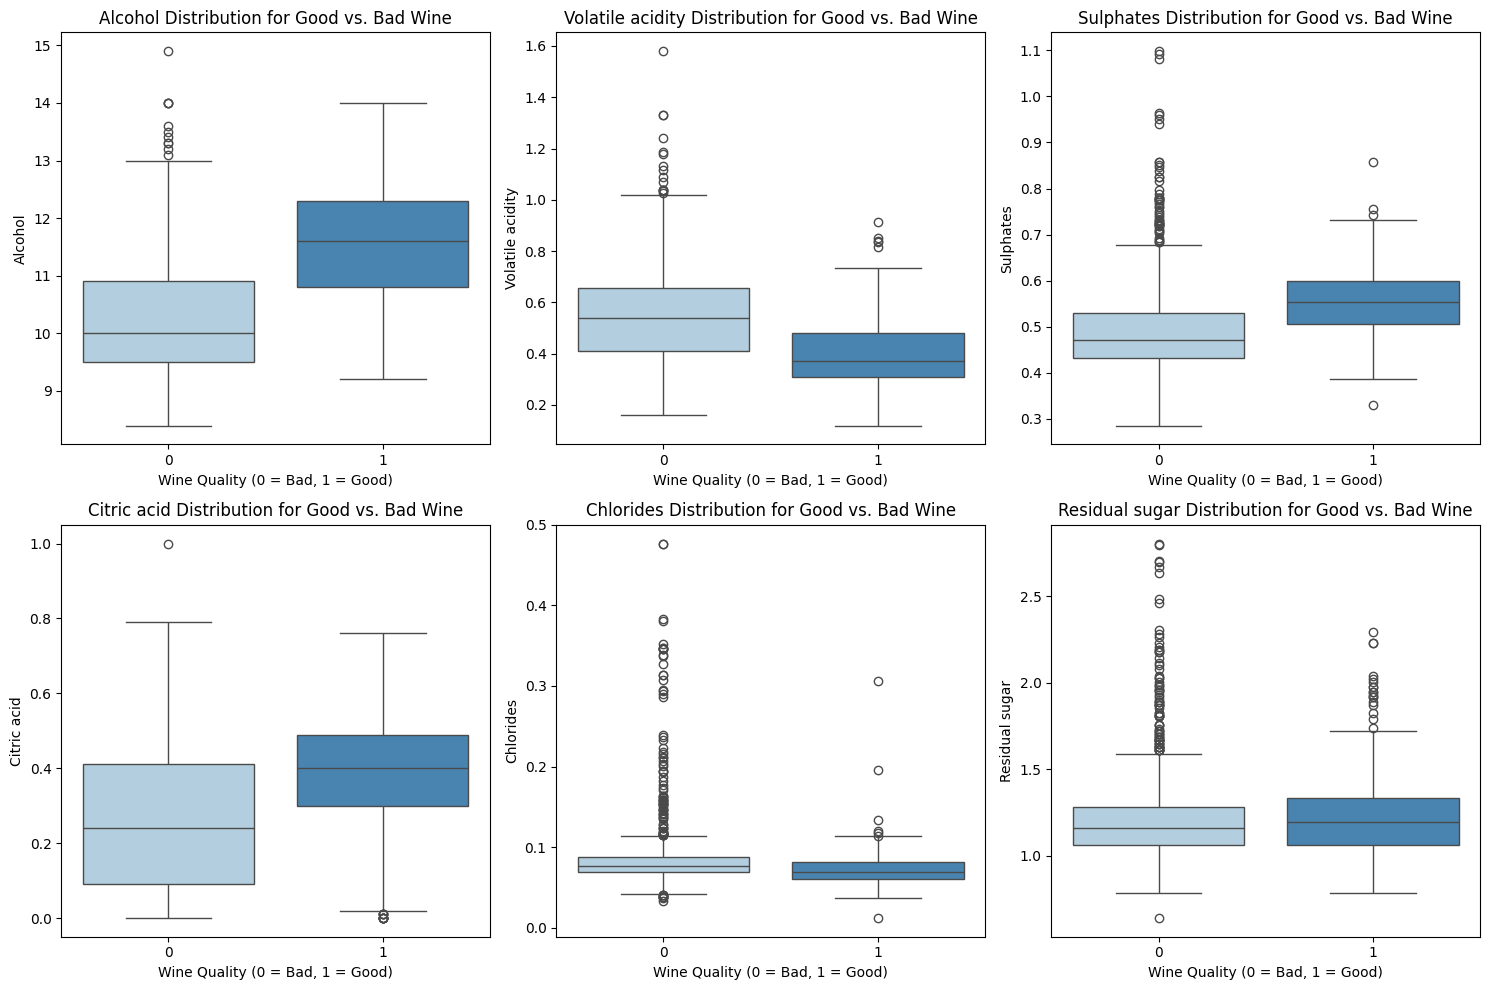

In [19]:
features = [
    "alcohol",
    "volatile acidity",
    "sulphates",
    "citric acid",
    "chlorides",
    "residual sugar",
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x="quality_binary",
        y=df_log_transformed[feature],
        data=df_log_transformed,
        palette="Blues",
        hue="quality_binary",
        legend=False,
    )
    plt.title(f"{feature.capitalize()} Distribution for Good vs. Bad Wine")
    plt.xlabel("Wine Quality (0 = Bad, 1 = Good)")
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

### 1. Alcohol
- Good wines have significantly higher alcohol content than bad wines.

- Median alcohol level is noticeably higher for good wines (~12) than bad ones (~10).

- Suggests higher alcohol content is strongly associated with better wine quality.

**`Higher alcohol = Higher quality`**

### 2. Volatile Acidity

- Good wines have lower volatile acidity (narrower spread, lower median).

- Bad wines show higher and more variable volatile acidity, meaning more acidic and possibly harsher wines.

- Why? Higher volatile acidity gives a vinegar-like taste, which reduces wine quality.

**`Lower volatile acidity = Higher quality`**

### 3. Sulphates

- Good wines have higher sulphates on average.

- Sulphates play a role in preserving and stabilizing wine.

- The distribution is noticeably different, with good wines showing higher medians.

**`Higher sulphates = Higher quality`**

### 4. Citric Acid

- Good wines tend to have higher citric acid content.

- Citric acid adds freshness and complexity to wine.

- Bad wines have more instances with very low citric acid levels.

**`Higher citric acid = Higher quality`**

### 5. Chlorides (Salt Content)

- Bad wines have slightly higher chlorides.

- Chlorides (salt) might give a negative taste in higher concentrations.

- Distribution is similar, but the slight difference suggests lower chlorides may be preferable.

**`Lower chlorides = Higher quality`**

### 6. Residual Sugar

- The distribution is fairly similar between good and bad wines.

- Suggests residual sugar does not strongly influence quality.

- The small overlap suggests it may not be a key determinant of wine quality.

Residual sugar does not strongly differentiate good and bad wines



In [20]:
mean_comparison = df_log_transformed.groupby("quality_binary").mean()

display(mean_comparison)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_binary,,,,,,,,,,,,
0,8.230809,0.548834,0.256587,1.209592,0.085227,2.661317,3.684003,0.996826,3.313106,0.493070,10.256851,5.393191
1,8.820109,0.405870,0.372880,1.259317,0.072939,2.507299,3.348286,0.995963,3.288587,0.554237,11.552808,7.092391


**Top Features That Differentiate Good vs. Bad Wines**
- Alcohol (+1.3 increase in Good Wines) → Most significant difference, higher alcohol is strongly linked to better quality.

- Volatile Acidity (-0.14 decrease in Good Wines) → Good wines have significantly lower volatile acidity, making them smoother.

- Sulphates (+0.06 increase in Good Wines) → Helps with wine preservation and stability.

- Citric Acid (+0.11 increase in Good Wines) → Adds freshness, slightly higher in good wines.

- Chlorides (-0.012 decrease in Good Wines) → Slightly lower in good wines, avoiding saltiness.

- Density (-0.0009 decrease in Good Wines) → Slightly lower in good wines, likely due to higher alcohol content.


## Conclusion 
- We will reject the Null Hypothesis and accept the alternative that Some Physiochemical properties of wine contribute to the quality of wine. 
- Alcohol, Sulphates, citric acid and right levels of acidity are contributing aspects to wine quality. 

**Recommendations**
- To fully be able to predict whether is wine is good or bad using pysiochemical properties above, we would have to use more robust methods like random trees and smote on this dataset to overcome it's various deficiecies 
